In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# import online data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data

In [6]:
# input data
digits.data.shape    # 1797 pictures and their size 64=8x8

(1797, 64)

In [7]:
# Output label
digits.target.shape
y = digits.target


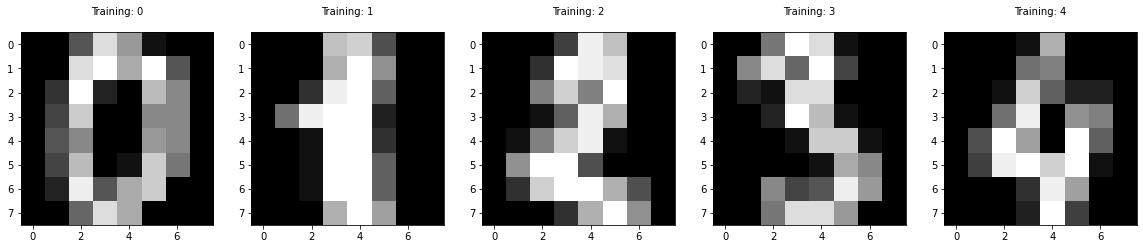

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap= plt.cm.gray)
    plt.title("Training: %i\n" %label , fontsize=10)

In [9]:
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
print("Train Input Data:", X_train.shape)
print("Test input Data:", X_test.shape)
print("Train output Data:", y_train.shape)
print("Test output Data:", y_test.shape)

Train Input Data: (1437, 64)
Test input Data: (360, 64)
Train output Data: (1437,)
Test output Data: (360,)


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
model

c:\Users\Saeed Ahmad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
prediction = model.predict(X_test)
prediction

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [13]:
# Accuracy test
score = model.score(X_test, y_test)
print("The accuracy score is:", score)

The accuracy score is: 0.9666666666666667


In [14]:
# confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, prediction)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

Text(0.5, 1.0, 'accuracy score:0.9666666666666667')

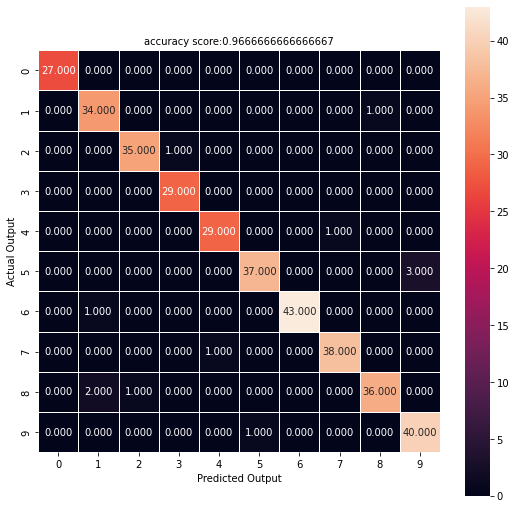

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,9)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
all_sample_title = "accuracy score:{0}".format(score)
plt.title(all_sample_title, size = 10)

In [16]:
# Getting missclassified Labels
import numpy as np
import matplotlib.pyplot as plt
index = 0
missclassifiedindexes = []
for label, predict in zip(y_test,prediction):
    if label != predict:
        missclassifiedindexes.append(index)
        index +=1

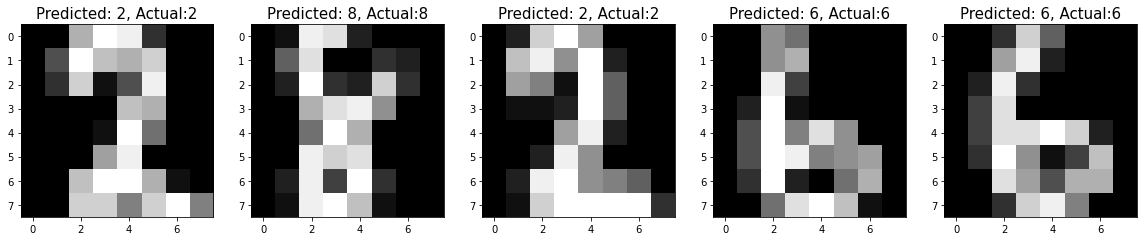

In [17]:
# Plotting misclassified labels with known labels
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(missclassifiedindexes[0:5]):
    plt.subplot(1,5, plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual:{}".format(prediction[badIndex], y_test[badIndex]),fontsize=15)
